# <font color='blue'> <b> <center> PRE-PROCESSING </center> </b> </font>

TABLA DE CONTENIDO

## <font color='red'> <b> 1. Introduction </b> </font>

## <font color='red'> <b> 2. Setup </b> </font>

In [6]:
import tensorflow as tf
import zipfile

## <font color='red'> <b> 2. Loading data </b> </font>

In [7]:
#!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [8]:
# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [9]:
!ls

cats_and_dogs_filtered	cats_and_dogs_filtered.zip  Pre-processing.ipynb


In [10]:
!ls cats_and_dogs_filtered

train  validation  vectorize.py


In [11]:
!ls cats_and_dogs_filtered/train

cats  dogs


In [13]:
!ls cats_and_dogs_filtered/train/cats | head -n 10 # show the first ten

cat.0.jpg
cat.100.jpg
cat.101.jpg
cat.102.jpg
cat.103.jpg
cat.104.jpg
cat.105.jpg
cat.106.jpg
cat.107.jpg
cat.108.jpg


In [15]:
# val
!ls cats_and_dogs_filtered/validation/cats | head -n 10

cat.2000.jpg
cat.2001.jpg
cat.2002.jpg
cat.2003.jpg
cat.2004.jpg
cat.2005.jpg
cat.2006.jpg
cat.2007.jpg
cat.2008.jpg
cat.2009.jpg


The datasets has the following folder structure:

cats_and_dogs_filtered 
  - train
      - cats
      
          -cat.0.jpg <br>
          -cat.1.jpg
          - ....
      - dogs
  - validation
      - cats
      
          -cat.2000.jpg <br>
          -cat.2001.jpg
          - ....
      - dogs


Now, let's do the same as before but with python:

In [17]:
import os

base_dir = 'cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [19]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print()
print(train_dog_fnames[:10])

['cat.998.jpg', 'cat.731.jpg', 'cat.341.jpg', 'cat.416.jpg', 'cat.342.jpg', 'cat.992.jpg', 'cat.116.jpg', 'cat.905.jpg', 'cat.901.jpg', 'cat.182.jpg']

['dog.334.jpg', 'dog.321.jpg', 'dog.692.jpg', 'dog.549.jpg', 'dog.625.jpg', 'dog.485.jpg', 'dog.413.jpg', 'dog.124.jpg', 'dog.174.jpg', 'dog.245.jpg']


In [20]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [21]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

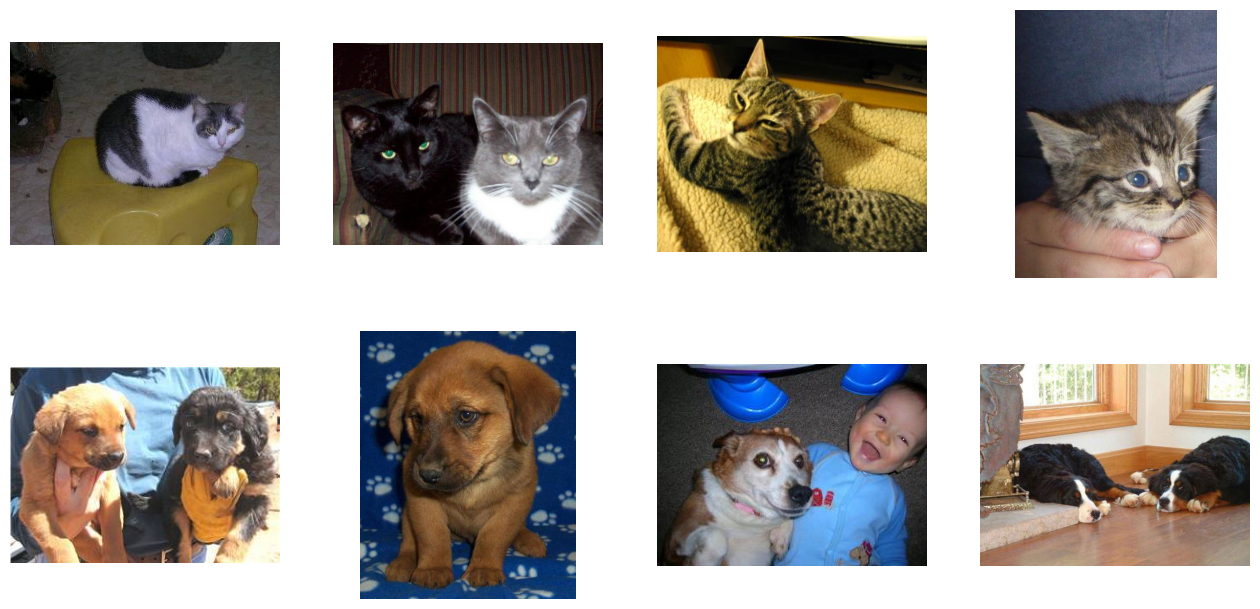

In [23]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=4

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-4:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-4:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

It may not be obvious from looking at the images in this grid but an important note here is that these images come in all shapes and sizes (just like the 'horses or humans' dataset). So before training a neural network with them, you'll need to tweak the images.

## <font color='red'> <b> 3. Pre-processing </b> </font>



### <font color='orange'> <b> 3.1. Using image data generator </b> </font>

Comencemos por usar [dsfds](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

´´´

tf.keras.preprocessing.image_dataset_from_directory(

    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)


image_size	Size to resize images to after they are read from disk, specified as (height, width). Defaults to (256, 256). Since the pipeline processes batches of images that must all have the same size, this must be provided.


validation_split	Optional float between 0 and 1, fraction of data to reserve for validation.


label_mode	String describing the encoding of labels. Options are:
"int": means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss).
"categorical" means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss).
"binary" means that the labels (there can be only 2) are encoded as float32 scalars with values 0 or 1 (e.g. for binary_crossentropy).
None (no labels).


subset	Subset of the data to return. One of "training", "validation", or "both". Only used if validation_split is set. When subset="both", the utility returns a tuple of two datasets (the training and validation datasets respectively).

´´´


In [43]:
data_dir = base_dir
img_size=256
batch_size=2 # for better printing
seed_value = 57

data=tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir,
                                                       shuffle=True,
                                                       seed=seed_value,
                                                       image_size=(img_size,img_size),
                                                       label_mode='categorical',
                                                       batch_size=batch_size)

Found 3000 files belonging to 2 classes.


In [44]:
type(data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [45]:
for x, y in data.take(1):
    print(x.shape, y.shape) # 1: batch size, las imágenes son 256x256x3; las etiquetas son one_hot
                        # con binary serán 0 ó 1
    print(x, y)

(2, 256, 256, 3) (2, 2)
tf.Tensor(
[[[[ 42.76758    32.76758    22.767578 ]
   [ 46.289913   33.289913   24.289913 ]
   [ 48.373047   35.373047   26.373047 ]
   ...
   [ 84.29779    80.75244    82.47085  ]
   [ 40.526146   36.35317    32.024445 ]
   [ 35.65523    32.65523    23.655231 ]]

  [[ 41.633663   31.633663   21.633663 ]
   [ 45.552135   32.552135   23.552135 ]
   [ 48.373047   35.373047   26.373047 ]
   ...
   [ 47.94436    42.042015   40.879906 ]
   [ 34.179688   28.64198    23.739037 ]
   [ 30.526493   27.526493   18.526493 ]]

  [[ 41.16211    31.16211    21.16211  ]
   [ 44.94106    31.94106    22.94106  ]
   [ 47.52351    34.52351    25.52351  ]
   ...
   [ 33.63093    25.273582   21.879051 ]
   [ 34.62144    28.5023     20.873394 ]
   [ 28.636719   25.798828   16.3125   ]]

  ...

  [[ 49.07694    34.07694    29.076939 ]
   [ 48.73828    35.73828    27.314453 ]
   [ 46.939526   34.312572   24.193432 ]
   ...
   [ 65.468895   60.468895   57.468895 ]
   [ 66.73316    66.58

Ahora generemos también el conjunto de validación (aquí no tiene sentido pues ya lo tengo dividido, auqneu puedo usar el otro como test)

In [49]:
data_train, data_val =tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir,
                                                       shuffle=True,
                                                       seed=seed_value,
                                                       image_size=(img_size,img_size),
                                                       label_mode='categorical',
                                                       validation_split=0.2,
                                                          subset='both',
                                                       batch_size=batch_size)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Using 600 files for validation.


los datos para un modelo como este deben ser escalados (dividir por 255).

Puedo:
    - usar re-escaling como primer capa del modelo (tf.keras.layers.Rescaling(1./255), )
    - fn. para re-escalar


### Data Augmentation

In [64]:
from tensorflow.keras import layers


# Defino las transformaciones
data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),         # Voltea horizontalmente las imágenes
        layers.RandomRotation(0.2),              # Rota las imágenes en un rango de [-0.2, 0.2] radianes
        layers.RandomZoom(0.2),                  # Hace zoom en un rango de [0.8, 1.2]
        layers.RandomHeight(0.2),                # Cambia la altura de la imagen aleatoriamente
        layers.RandomWidth(0.2),                 # Cambia el ancho de la imagen aleatoriamente
        layers.RandomContrast(0.2),              # Ajusta el contraste de la imagen
        layers.RandomBrightness(0.2),            # Ajusta el brillo de la imagen
    ]
)


train_data = data_train

# aplico
train_data = train_data.map(
    lambda x, y: (data_augmentation(x, training=True), y))

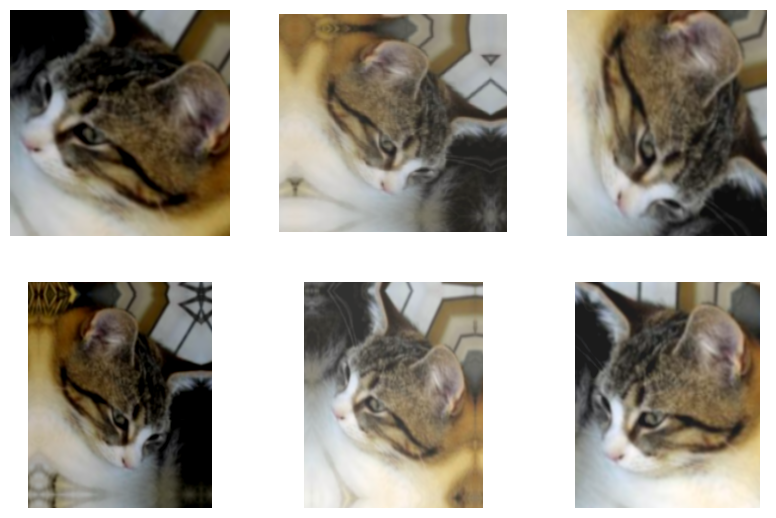

In [65]:
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
    for i in range(6):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [66]:
!ls

cats_and_dogs_filtered	cats_and_dogs_filtered.zip  Pre-processing.ipynb


In [70]:
# Load dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "cats_and_dogs_filtered",
    image_size=(256, 256),  # Target image size
    batch_size=2
)

# Define the rescaling function
def rescale(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Scale pixel values to [0, 1]
    return image, label

# Apply rescaling before prefetching
train_ds = train_ds.map(rescale)

# Add prefetch for performance optimization
#train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

Found 3000 files belonging to 2 classes.


In [71]:
for x, y in train_ds.take(1):
    print(x, y)

tf.Tensor(
[[[[0.08081749 0.10866137 0.10541561]
   [0.09924029 0.13881285 0.13359459]
   [0.14016388 0.19022515 0.19022515]
   ...
   [0.1721724  0.22295628 0.17103247]
   [0.12257427 0.1780277  0.14720662]
   [0.07058824 0.12941177 0.10196079]]

  [[0.09723558 0.11934575 0.10607982]
   [0.10064673 0.13879095 0.12828153]
   [0.12417603 0.17216139 0.1667386 ]
   ...
   [0.17976409 0.22682291 0.17676164]
   [0.11864109 0.17100184 0.14018077]
   [0.07471888 0.12811962 0.10066863]]

  [[0.113922   0.1282576  0.09841692]
   [0.09806985 0.12460542 0.10595524]
   [0.10945052 0.15312284 0.1396129 ]
   ...
   [0.17357752 0.22063634 0.17103247]
   [0.11548714 0.16527267 0.13436759]
   [0.07529105 0.12507659 0.09702819]]

  ...

  [[0.01755515 0.02147672 0.        ]
   [0.02129289 0.02521446 0.00168505]
   [0.02202819 0.02594976 0.00242034]
   ...
   [0.6335642  0.69630927 0.6923877 ]
   [0.6227366  0.68548167 0.6815601 ]
   [0.63739914 0.70014423 0.69622266]]

  [[0.01755515 0.02147672 0.      

vemos que ahora los valores de pixeles de las imágenes están normalizados entre 0 y 1

### <font color='orange'> <b> 3.1. Using Image Data Generator </b> </font>

(dssadsa)[https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator]

´´´
tf.keras.preprocessing.image.ImageDataGenerator(

    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None
)
´´´

Vemos que ya incluye posibilidades de re-escale así como opciones para implementar data augmentation.


We use the flow_from_directory method, which is a generator, which takes in the path to the parent directory containing different classes of image data and generates batches of images to be fed to the ImageDataGenerator. This is the expected directory structure of the flow_from_directory method.

Parent_directory
      |
      
      |--Class_1_folder
      |
      
      |--Class_2_folder
      |
      
      |--Class_3_folder

In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [76]:
type(train_datagen), type(train_generator)

(keras.src.preprocessing.image.ImageDataGenerator,
 keras.src.preprocessing.image.DirectoryIterator)

# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
These are just a few of the options available. Let's quickly go over it:

rotation_range is a value in degrees (0–180) within which to randomly rotate pictures.
width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
shear_range is for randomly applying shearing transformations.
zoom_range is for randomly zooming inside pictures.
horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift

In [115]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='reflect')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(256, 256),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(256, 256),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [116]:
type(train_datagen)

keras.src.preprocessing.image.ImageDataGenerator

In [83]:
for batch_images, batch_labels in train_generator:
    # batch_images: array of image data with shape (batch_size, height, width, channels)
    # batch_labels: array of labels corresponding to the images

    # Process the batch here (e.g., feed into a model or visualize)
    # For example:
    print("Batch of images shape:", batch_images.shape)
    print("Batch of labels shape:", batch_labels.shape)
    
    # Optional: break the loop after a few batches for testing
    break

Batch of images shape: (20, 150, 150, 3)
Batch of labels shape: (20,)


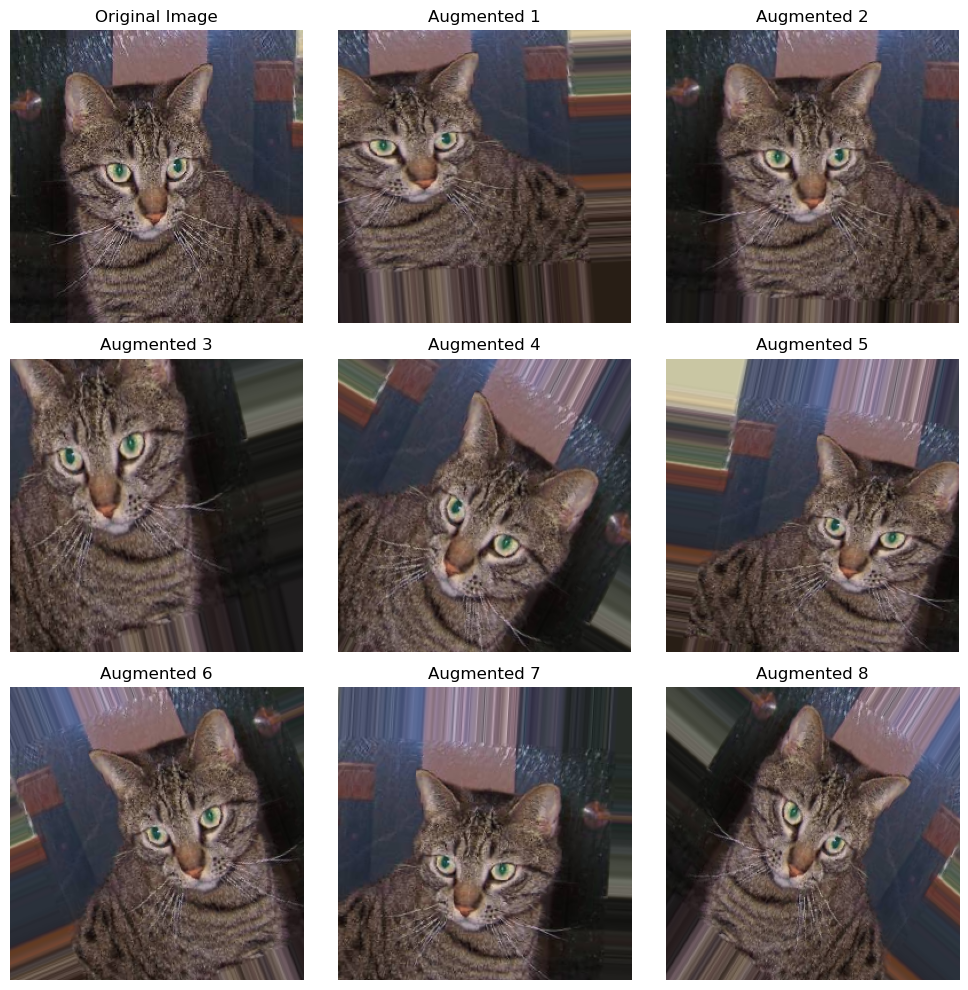

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Set up the ImageDataGenerator with multiple augmentations
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load a single image
img_path = 'cats_and_dogs_filtered/train/cats/cat.1.jpg'  # Replace with the path to your image
img = load_img(img_path, target_size=(256, 256))  # Resize for consistency
img_array = img_to_array(img)  # Convert to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Create an iterator that generates augmented images
augmented_images = data_gen.flow(img_array, batch_size=1)

# Plot the original and augmented images
plt.figure(figsize=(10, 10))

# Display the original image first
plt.subplot(3, 3, 1)
plt.imshow(img_array[0] / 255.0)  # Original image (scaled)
plt.title("Original Image")
plt.axis('off')

# Generate and display 8 augmented images
for i in range(2, 10):
    batch = next(augmented_images)  # Generate augmented image batch
    augmented_image = batch[0]  # Get the first image from the batch
    
    plt.subplot(3, 3, i)
    plt.imshow(augmented_image)  # Display the augmented image
    plt.title(f"Augmented {i-1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [77]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
history = model.fit(
            train_generator,
            steps_per_epoch=100,
            epochs=5,
            validation_data=validation_generator,
            validation_steps=50,
            verbose=2
            )